# Pymaceuticals Inc.

### Analysis

- Overall 248 mice were tested in this experiment with 51% of them being male and 49% female. There was only one outlier and it took place under the treatment group; Infubinol. 
- When comparing the final tumor volume of four of the treatment regimens. We found that Capomulin and Ramicane were both very similar in tumor volume by drug regimen with their means being 38 & 36%. While Infubinol and Ceftamin were much higher with means being 60 & 64%.
- Within Capomulin alone, it appears that the heavier the mouse is, the higher average tumor volume. This has a positive correlation of 0.84. We also found that the treatment showed positive effects on mouse 150, lowering its tumor volume during the course of treatment. 

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = merge_df["Mouse ID"].nunique()
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = merge_df[merge_df["Mouse ID"].isin(duplicate_mice_ID)==False]
clean_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_dataframe = clean_dataframe["Mouse ID"].nunique()
clean_mice_dataframe

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).mean()
median = clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).median()
var = clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).var()
std = clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).std()
sem = clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).sem()
 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = pd.DataFrame({"Mean Tumor Volume":mean,
                              "Median Tumor Volume":median,
                              "Tumor Volume Variance": var,
                              "Tumor Volume Std.Dev.": std,
                              "Tumor Volume Std.Err.": sem})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg = clean_dataframe.groupby (["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

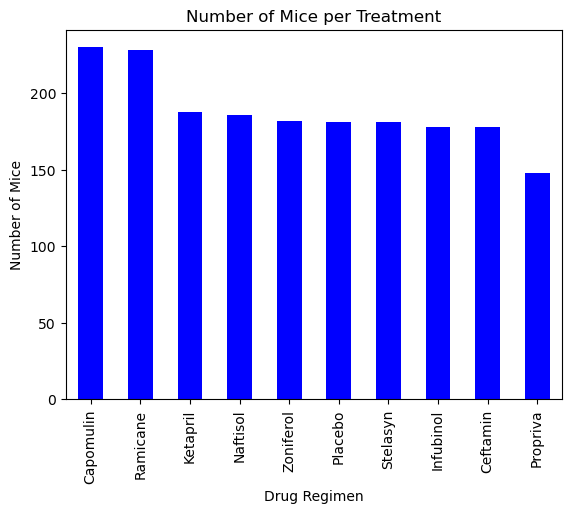

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested = clean_dataframe["Drug Regimen"].value_counts()

tested_barplot = mice_tested.plot.bar(color="b")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

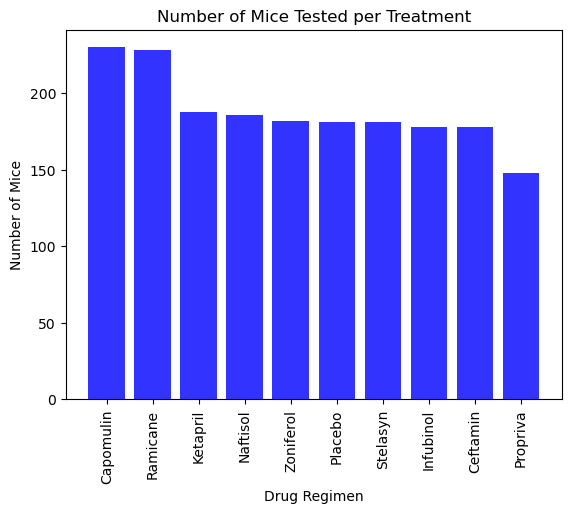

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_tested.index.values
y_axis = mice_tested.values
plt.bar (x_axis, y_axis, color="b", alpha=0.8, align="center")


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested per Treatment") 
plt.xticks(rotation="vertical")

plt.show()

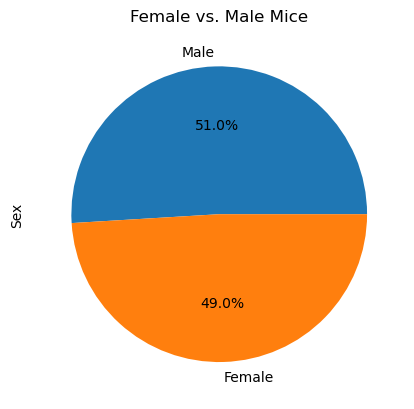

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = clean_dataframe["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

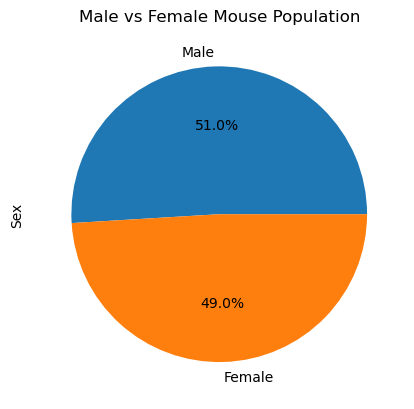

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["male", "Female"]
plot = gender_data.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title('Male vs Female Mouse Population')
plt.show

In [13]:
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Capomulin", :]
Ramicane_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Capomulin_last = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merg = pd.merge(Capomulin_vol, clean_dataframe, on=("Mouse ID", "Timepoint"),how="left")

Ramicane_last = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merg = pd.merge(Ramicane_vol, clean_dataframe, on=("Mouse ID", "Timepoint"),how="left")

Infubinol_last = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merg = pd.merge(Infubinol_vol, clean_dataframe, on=("Mouse ID", "Timepoint"),how="left")

Ceftamin_last = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merg = pd.merge(Ceftamin_vol, clean_dataframe, on=("Mouse ID", "Timepoint"),how="left")

#Capomulin_merg.head()
#Ramicane_merg.head()
#Infubinol_merg.head()
#Ceftamin_merg.head()

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  # Locate the rows which contain mice on each drug and get the tumor volumes
  # add subset 
  # Determine outliers using upper and lower bounds
    
Capomulin_tumors = Capomulin_merg["Tumor Volume (mm3)"]
quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumors is: {lowerq}")
print(f"The upper quartile of Capomulin Tumors: {upperq}")
print(f"The interquartile range of Capomulin Tumors is: {iqr}")
print(f"The the median of Capomulin Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin Tumors is: 32.37735684
The upper quartile of Capomulin Tumors: 40.1592203
The interquartile range of Capomulin Tumors is: 7.781863460000004
The the median of Capomulin Tumors is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
Ramicane_tumors = Ramicane_merg["Tumor Volume (mm3)"]
quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Tumors is: {lowerq}")
print(f"The upper quartile of Ramicane Tumors: {upperq}")
print(f"The interquartile range of Ramicane Tumors is: {iqr}")
print(f"The the median of Ramicane Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane Tumors is: 31.56046955
The upper quartile of Ramicane Tumors: 40.65900627
The interquartile range of Ramicane Tumors is: 9.098536719999998
The the median of Ramicane Tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [17]:
Infubinol_tumors = Infubinol_merg["Tumor Volume (mm3)"]
quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumors is: {lowerq}")
print(f"The upper quartile of Infubinol Tumors: {upperq}")
print(f"The interquartile range of Infubinol Tumors is: {iqr}")
print(f"The the median of Infubinol Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol Tumors is: 54.04860769
The upper quartile of Infubinol Tumors: 65.52574285
The interquartile range of Infubinol Tumors is: 11.477135160000003
The the median of Infubinol Tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [18]:
Ceftamin_tumors = Ceftamin_merg["Tumor Volume (mm3)"]
quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin Tumors is: {lowerq}")
print(f"The upper quartile of Ceftamin Tumors: {upperq}")
print(f"The interquartile range of Ceftamin Tumors is: {iqr}")
print(f"The the median of Ceftamin Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin Tumors is: 48.72207785
The upper quartile of Ceftamin Tumors: 64.29983003
The interquartile range of Ceftamin Tumors is: 15.577752179999997
The the median of Ceftamin Tumors is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


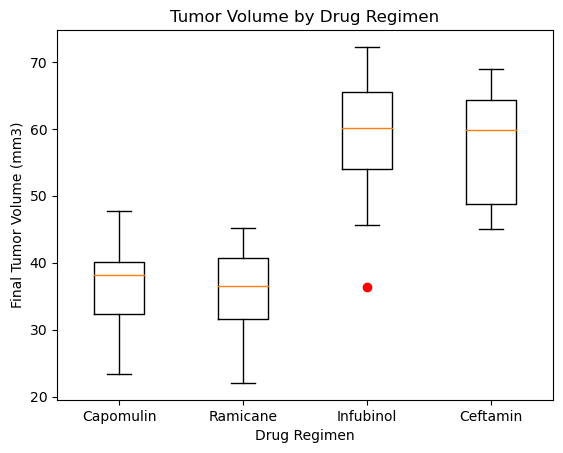

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

box_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
plt.title("Tumor Volume by Drug Regimen")
ax1.boxplot(box_plot, labels=Regimen, widths = 0.4, vert=True, sym='r')

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

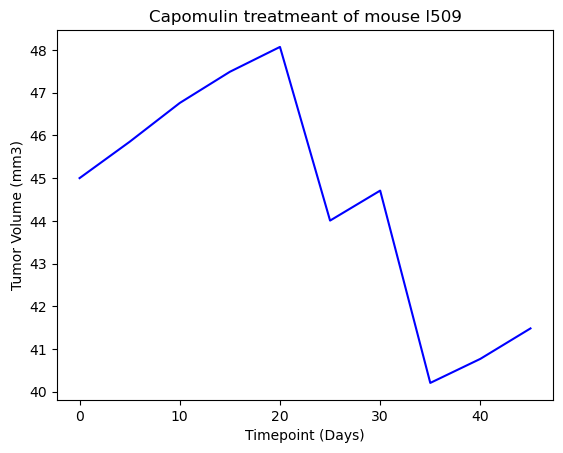

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:] 

x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatmeant of mouse l509")
plt.plot(x_axis, y_axis, color="blue")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

In [21]:
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


Text(0.5, 1.0, 'Mouse Weight Versus Average Tumor Volume')

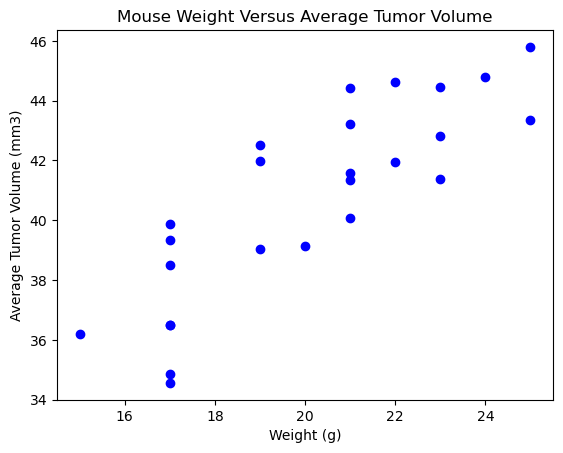

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1, = plt.subplots()

scatter_plot = Capomulin_df.groupby(["Mouse ID"]).mean()

marker_size=10
plt.scatter(scatter_plot["Weight (g)"], scatter_plot["Tumor Volume (mm3)"], facecolors="blue")  
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Mouse Weight Versus Average Tumor Volume')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


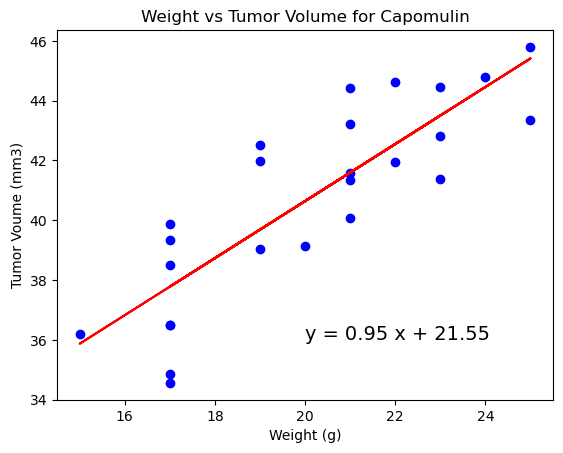

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(scatter_plot["Weight (g)"], scatter_plot["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


(slope, intercept,rvalue, pvalue, stderr)= linregress(scatter_plot["Weight (g)"],scatter_plot["Tumor Volume (mm3)"])
regress_values=scatter_plot["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept,2)}"

plt.scatter(scatter_plot["Weight (g)"],scatter_plot["Tumor Volume (mm3)"],color="b")
plt.plot(scatter_plot["Weight (g)"],regress_values, color="red")
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Voume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()